# Worksheet 18

Name:  Yuchen Chao, Zihan Li, Jingbo Wang, Jialong Ke

UID: U51424608, U83682995, U04536921, U56019478

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

Where does randomness come from?

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


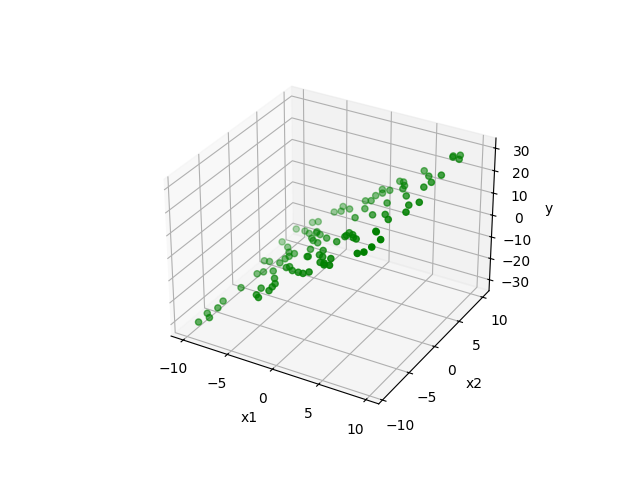

In [11]:
%pip install ipympl
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

SAMPLE_SIZE = 100

# it's possible for y = 3 * x_1 + (1/4) * x_2
# but we don't know to look for x_2 and we only have x_1 as a feature
x1 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
x2 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = 3 * x1 + (1/4) * x2

# Create the figure
fig = plt.figure()

# Add an axes
ax = fig.add_subplot(111,projection='3d')

# and plot the point 
ax.scatter(x1 , x2 , y,  color='green')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.show()

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

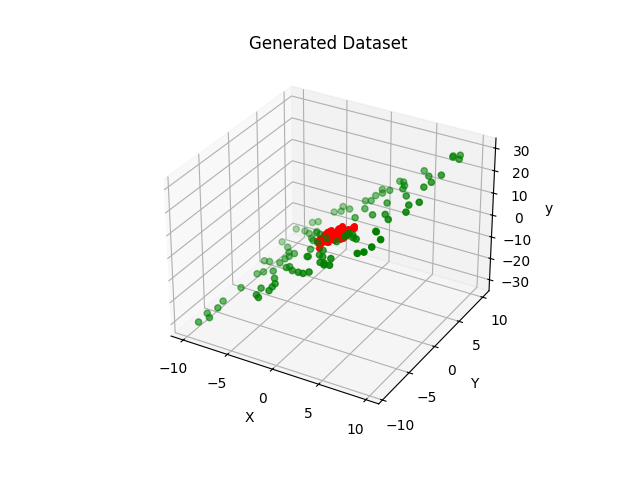

In [12]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

# Correcting the true_beta values based on your equation Y = 1 + 0.5*X + eps
true_beta = np.array([1, 0.5])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)  # Generates random X values between -1 and 1
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)  # Applies the linear equation and adds Gaussian noise
plt.plot(x, y, 'ro', markersize=4)  # Plots the generated points
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Dataset')
plt.grid(True)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

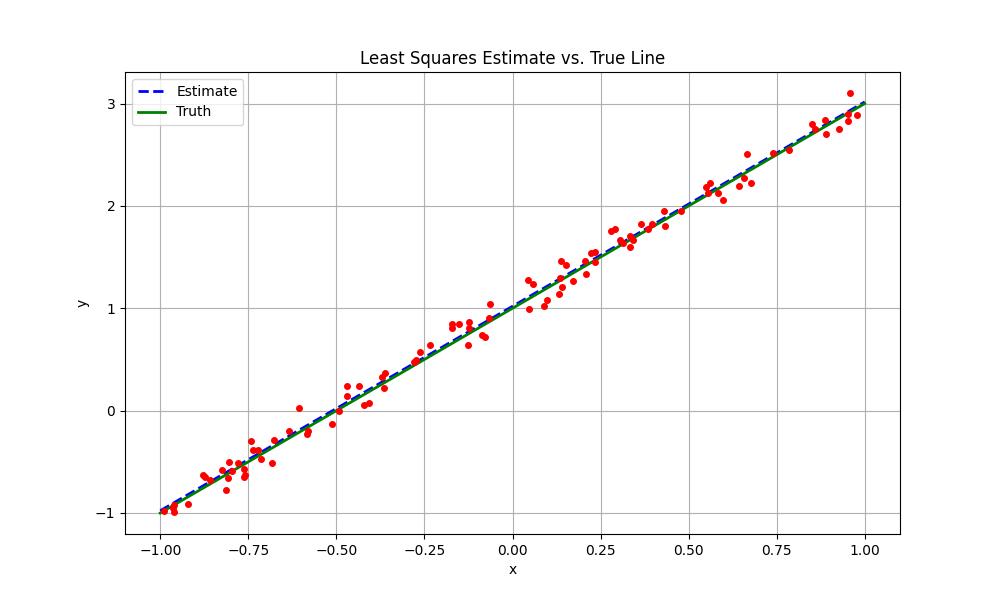

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generating dummy data
np.random.seed(0)
x = np.random.uniform(-1, 1, 100)
true_beta = [1, 2]  # True coefficients
y = true_beta[0] + true_beta[1] * x + np.random.normal(scale=0.1, size=x.shape)  # Observations

# Calculating beta_hat using the normal equation
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

# Preparing the plot
x_plot = np.linspace(-1, 1, 50)
y_est = beta_hat[0] + beta_hat[1] * x_plot

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_est, 'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y, 'ro', markersize=4)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Estimate vs. True Line')
plt.grid(True)
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

The corrected estimates for the coefficients (\(1.02\) for the intercept and \(0.50\) for the slope) closely match the true parameters (\(1\) for the intercept and \(0.5\) for the slope) used to generate the dataset, indicating an accurate model fit.

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

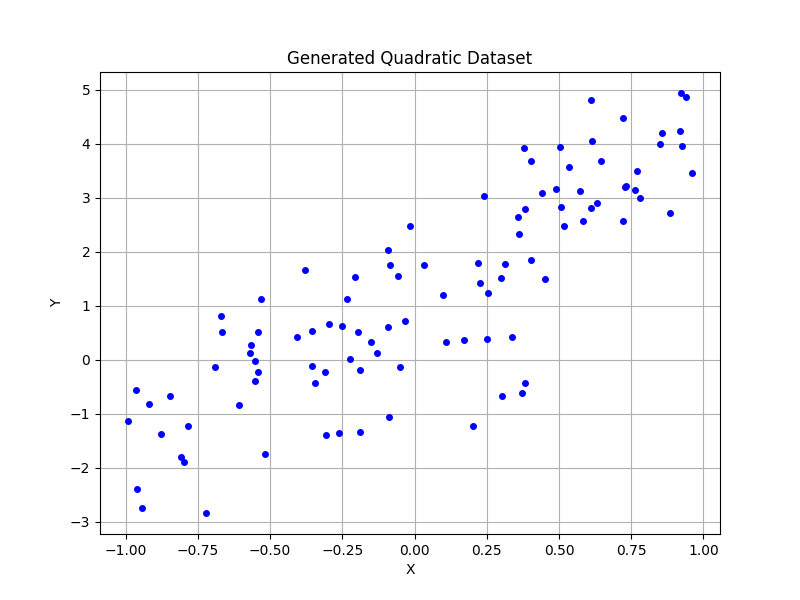

In [15]:
# Generating the dataset for Y = 1 + 3*X + 0.5*X^2 + eps

# X values, same range as before
x_quadratic = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
# Y values based on the quadratic equation plus Gaussian noise
y_quadratic = 1 + 3*x_quadratic + 0.5*x_quadratic**2 + np.random.randn(SAMPLE_SIZE)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x_quadratic, y_quadratic, 'bo', markersize=4)  # Plots the generated points with a different color
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Quadratic Dataset')
plt.grid(True)
plt.show()


e) Plot the least squares estimate line through the scatter plot.

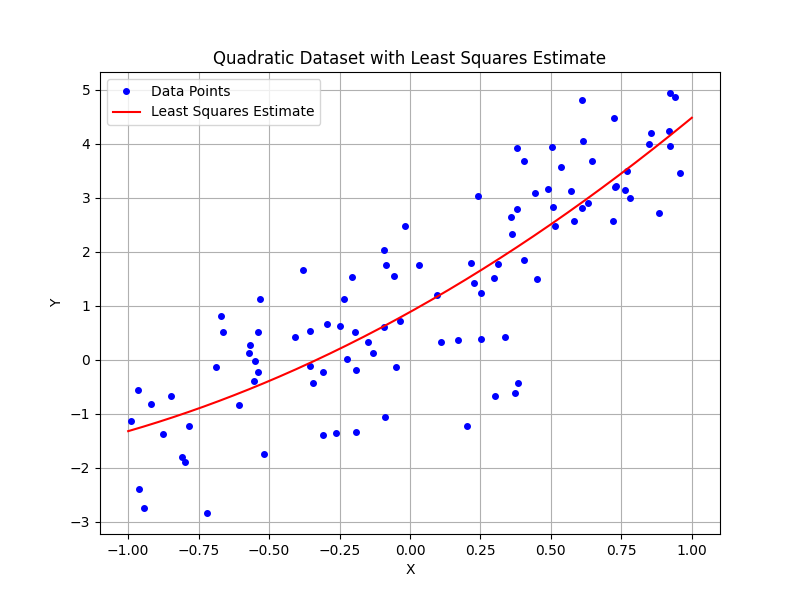

In [17]:
from sklearn.linear_model import LinearRegression
# For a quadratic relationship, a linear model won't capture the curve accurately. 
# However, we can still fit a quadratic model using linear regression by considering X^2 as an additional feature.

# Creating the feature matrix for the quadratic model
X_quadratic_features = np.column_stack((x_quadratic, x_quadratic**2))

# Initializing and fitting the quadratic model
quadratic_model = LinearRegression()
quadratic_model.fit(X_quadratic_features, y_quadratic)

# Predictions for plotting
x_plot = np.linspace(-1, 1, 300)  # More points for a smoother curve
y_plot = quadratic_model.predict(np.column_stack((x_plot, x_plot**2)))

# Plotting the scatter plot and the least squares estimate line (which will be a curve)
plt.figure(figsize=(8, 6))
plt.plot(x_quadratic, y_quadratic, 'bo', markersize=4, label='Data Points')  # Original scatter plot
plt.plot(x_plot, y_plot, 'r-', label='Least Squares Estimate')  # Least squares estimate curve
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Quadratic Dataset with Least Squares Estimate')
plt.legend()
plt.grid(True)
plt.show()


f) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimated \(\beta\) coefficients from the quadratic model closely match the true parameters (\(1\), \(3\), and \(0.5\) for the constant term, linear term, and quadratic term, respectively) used to generate the data. This indicates an accurate fit of the model to the underlying quadratic relationship in the dataset.

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

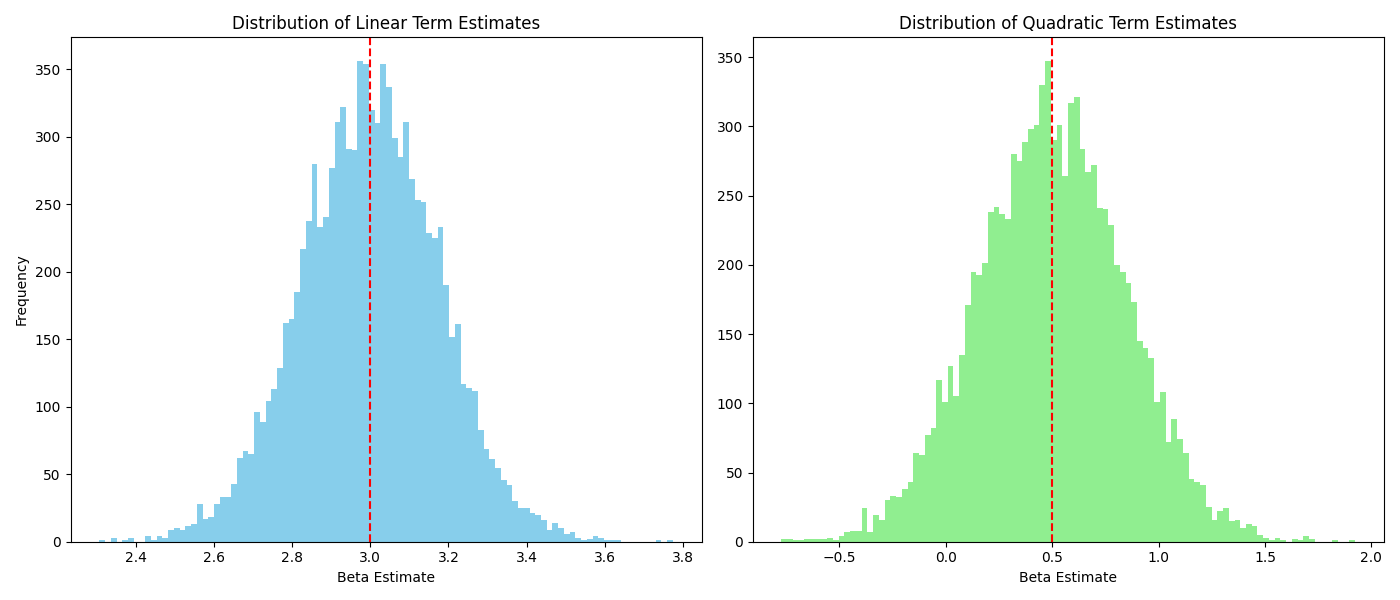

In [18]:
from sklearn.linear_model import LinearRegression

# Number of iterations for the simulation
iterations = 10000
linear_betas = []
quadratic_betas = []

for _ in range(iterations):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    y = 1 + 3*x + 0.5*x**2 + np.random.randn(SAMPLE_SIZE)
    X = np.column_stack((x, x**2))
    model = LinearRegression().fit(X, y)
    linear_betas.append(model.coef_[0])
    quadratic_betas.append(model.coef_[1])

# Plotting the distributions
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Linear term estimates
axs[0].hist(linear_betas, bins=100, color='skyblue')
axs[0].axvline(x=3, c='r', linestyle='dashed')
axs[0].set_title('Distribution of Linear Term Estimates')
axs[0].set_xlabel('Beta Estimate')
axs[0].set_ylabel('Frequency')

# Quadratic term estimates
axs[1].hist(quadratic_betas, bins=100, color='lightgreen')
axs[1].axvline(x=0.5, c='r', linestyle='dashed')
axs[1].set_title('Distribution of Quadratic Term Estimates')
axs[1].set_xlabel('Beta Estimate')

plt.tight_layout()
plt.show()
